# ISWR Total lung capacity dataset
### Description
The tlc data frame has 32 rows and 4 columns. It contains data on pretransplant total lung capacity (TLC) for recipients of heart-lung transplants by whole-body plethysmography.

##### Usage: tlc

### Format This data frame contains the following columns:

#### age
a numeric vector, age of recipient (years).

#### sex
a numeric vector code, female: 1, male: 2.

#### height
a numeric vector, height of recipient (cm).

#### tlc
a numeric vector, total lung capacity (l).

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# importing the dataset
url = "https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/iswr/tlc.csv"
df = pd.read_csv(url)

df.head(10)

,age,sex,height,tlc
0,35,1,149,3.40
1,11,1,138,3.41
2,12,2,148,3.80
3,16,1,156,3.90
4,32,1,152,4.00
5,16,1,157,4.10
6,14,1,165,4.46
7,16,2,152,4.55
8,35,1,177,4.83
9,33,1,158,5.10


### 1. Define classes Target: Low/High

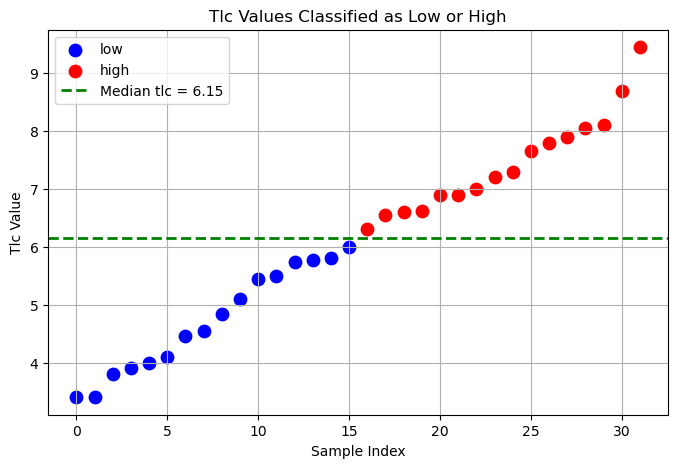

In [127]:
median_tlc = df['tlc'].median()
median_tlc

df['target'] = df['tlc'].apply(lambda x: 'low' if x < median_tlc else 'high')

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot (index on x-axis, TLC on y-axis)
for label, color in [('low', 'blue'), ('high', 'red')]:
    subset = df[df['target'] == label]
    plt.scatter(subset.index, subset['tlc'], 
                color=color, label=label, s=80)

# Add median line
plt.axhline(median_tlc, color='green', linestyle='--', linewidth=2,
            label=f"Median tlc = {median_tlc:.2f}")

plt.title("Tlc Values Classified as Low or High")
plt.xlabel("Sample Index")
plt.ylabel("Tlc Value")
plt.legend()
plt.grid(True)
plt.show()

## 1.1 KNN = 4: No normalization, high/low classification target value

In [128]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # no normalization
y = df["target"]                    # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test)

# --- EVALUATION ---
accuracy_1_1 = accuracy_score(y_test, y_pred)
precision_1_1 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_1_1 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_1_1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_1_1, 2))
print("Precision:", round(precision_1_1, 2))
print("Recall:", round(recall_1_1, 2))
print("F1 Score:", round(f1_1_1, 2))

Accuracy: 0.71
Precision: 0.83
Recall: 0.67
F1 Score: 0.65


## 1.2 KNN = 4: With normalization, high/low classification target value

In [129]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_1_2 = accuracy_score(y_test, y_pred)
precision_1_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_1_2 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_1_2 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_1_2, 2))
print("Precision:", round(precision_1_2, 2))
print("Recall:", round(recall_1_2, 2))
print("F1 Score:", round(f1_1_2, 2))

Accuracy: 0.86
Precision: 0.9
Recall: 0.83
F1 Score: 0.84


### 2. Define classes Target: Low/Medium/High

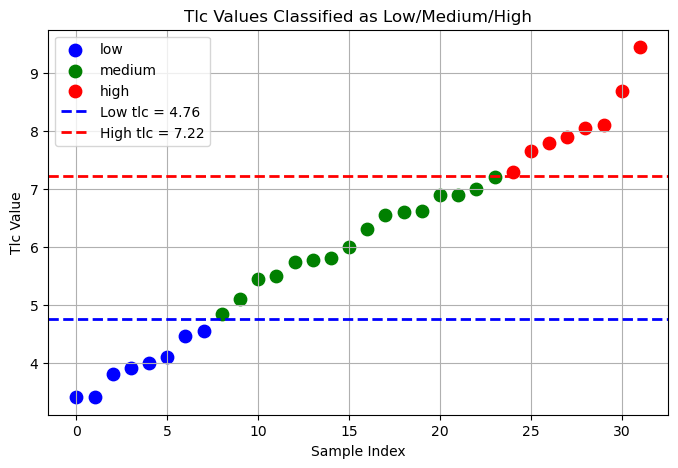

In [130]:
# Quartiles
q1 = df['tlc'].quantile(0.25)
q3 = df['tlc'].quantile(0.75)

# 3-class target
def classify_tlc(x):
    if x < q1:
        return "low"
    elif x > q3:
        return "high"
    else:
        return "medium"

df['target'] = df['tlc'].apply(classify_tlc)

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot (index on x-axis, TLC on y-axis)
for label, color in [('low', 'blue'), ('medium', 'green'), ('high', 'red')]:
    subset = df[df['target'] == label]
    plt.scatter(subset.index, subset['tlc'], 
                color=color, label=label, s=80)

# Add low/high line
plt.axhline(q1, color='blue', linestyle='--', linewidth=2,
            label=f"Low tlc = {q1:.2f}")
plt.axhline(q3, color='red', linestyle='--', linewidth=2,
            label=f"High tlc = {q3:.2f}")

plt.title("Tlc Values Classified as Low/Medium/High")
plt.xlabel("Sample Index")
plt.ylabel("Tlc Value")
plt.legend()
plt.grid(True)
plt.show()

## 2.1 KNN = 4: With normalization, low/medium/high classification target value

In [131]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_2_1 = accuracy_score(y_test, y_pred)
precision_2_1 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_2_1 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_2_1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_2_1, 2))
print("Precision:", round(precision_2_1, 2))
print("Recall:", round(recall_2_1, 2))
print("F1 Score:", round(f1_2_1, 2))


Accuracy: 0.57
Precision: 0.44
Recall: 0.39
F1 Score: 0.41


## 2.2 KNN = 5: With normalization, low/medium/high classification target value

In [132]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_2_2 = accuracy_score(y_test, y_pred)
precision_2_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_2_2 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_2_2 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_2_2, 2))
print("Precision:", round(precision_2_2, 2))
print("Recall:", round(recall_2_2, 2))
print("F1 Score:", round(f1_2_2, 2))

Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


### 3. Define classes Target: Very Low/Low/Medium/High/Very High

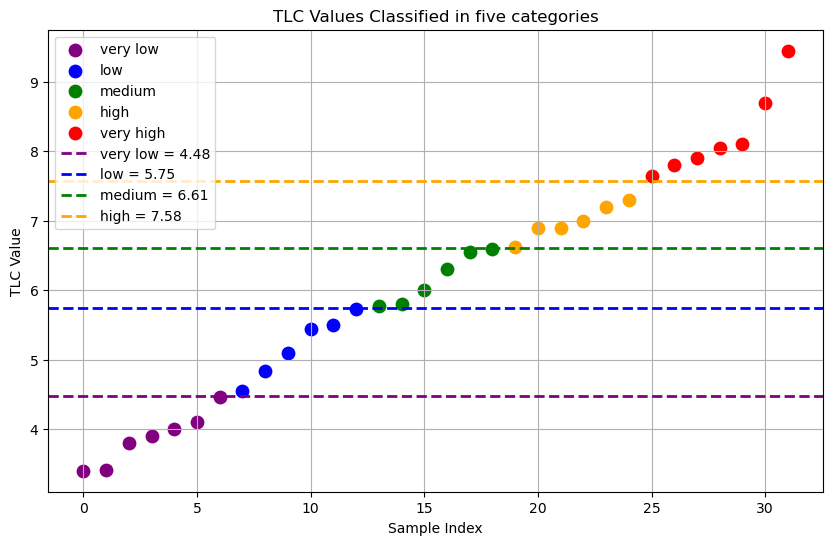

In [133]:
# Quintiles
q20 = df['tlc'].quantile(0.20)
q40 = df['tlc'].quantile(0.40)
q60 = df['tlc'].quantile(0.60)
q80 = df['tlc'].quantile(0.80)

# 5-class target
def classify_tlc(x):
    if x < q20:
        return "very low"
    elif x < q40:
        return "low"
    elif x < q60:
        return "medium"
    elif x < q80:
        return "high"
    else:
        return "very high"

df['target'] = df['tlc'].apply(classify_tlc)

plt.figure(figsize=(10, 6))

colors = {
    "very low": "purple",
    "low": "blue",
    "medium": "green",
    "high": "orange",
    "very high": "red"
}

for label in ["very low", "low", "medium", "high", "very high"]:
    subset = df[df['target'] == label]
    plt.scatter(
        subset.index,
        subset['tlc'],
        color=colors[label],
        label=label,
        s=80
    )

# Add quintile lines
plt.axhline(q20, color='purple', linestyle='--', linewidth=2, label=f"very low = {q20:.2f}")
plt.axhline(q40, color='blue', linestyle='--', linewidth=2, label=f"low = {q40:.2f}")
plt.axhline(q60, color='green', linestyle='--', linewidth=2, label=f"medium = {q60:.2f}")
plt.axhline(q80, color='orange', linestyle='--', linewidth=2, label=f"high = {q80:.2f}")

plt.title("TLC Values Classified in five categories")
plt.xlabel("Sample Index")
plt.ylabel("TLC Value")
plt.legend()
plt.grid(True)
plt.show()

## 3.1 KNN = 4: With normalization, five classes classification target value

In [134]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_3_1 = accuracy_score(y_test, y_pred)
precision_3_1 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_3_1 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_3_1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_3_1, 2))
print("Precision:", round(precision_3_1, 2))
print("Recall:", round(recall_3_1, 2))
print("F1 Score:", round(f1_3_1, 2))

Accuracy: 0.71
Precision: 0.58
Recall: 0.75
F1 Score: 0.65


## 3.2 KNN = 2: With normalization, five classes classification target value

In [135]:
# --- FEATURES & LABEL ---
X = df[["age", "sex", "height"]]   # features to be normalized
y = df["target"]                   # used as target value

# --- TRAIN / TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- NORMALIZATION ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN CLASSIFIER ---
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# --- PREDICTION ---
y_pred = knn.predict(X_test_scaled)

# --- EVALUATION ---
accuracy_3_2 = accuracy_score(y_test, y_pred)
precision_3_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_3_2 = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_3_2 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", round(accuracy_3_2, 2))
print("Precision:", round(precision_3_2, 2))
print("Recall:", round(recall_3_2, 2))
print("F1 Score:", round(f1_3_2, 2))

Accuracy: 0.86
Precision: 0.92
Recall: 0.88
F1 Score: 0.87


In [ ]:
print("1.1 KNN = 4: No normalization, high/low classification target value")
print("Accuracy:", round(accuracy_1_1, 2))
print("Precision:", round(precision_1_1, 2))
print("Recall:", round(recall_1_1, 2))
print("F1 Score:", round(f1_1_1, 2))
print("-------------------------------------")

print("1.2 KNN = 4: With normalization, high/low classification target value")
print("Accuracy:", round(accuracy_1_2, 2))
print("Precision:", round(precision_1_2, 2))
print("Recall:", round(recall_1_2, 2))
print("F1 Score:", round(f1_1_2, 2))
print("-------------------------------------")

print("2.1 KNN = 4: With normalization, low/medium/high classification target value")
print("Accuracy:", round(accuracy_2_1, 2))
print("Precision:", round(precision_2_1, 2))
print("Recall:", round(recall_2_1, 2))
print("F1 Score:", round(f1_2_1, 2))

1.1 KNN = 4: No normalization, high/low classification target value
Accuracy: 0.71
Precision: 0.83
Recall: 0.67
F1 Score: 0.65
-------------------------------------
1.2 KNN = 4: With normalization, high/low classification target value
Accuracy: 0.86
Precision: 0.9
Recall: 0.83
F1 Score: 0.84
-------------------------------------
2.1 KNN = 4: With normalization, low/medium/high classification target value
Accuracy: 0.57
Precision: 0.44
Recall: 0.39
F1 Score: 0.41
-------------------------------------
2.2 KNN = 5: With normalization, low/medium/high classification target value
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


In [ ]:
print("2.2 KNN = 5: With normalization, low/medium/high classification target value")
print("Accuracy:", round(accuracy_2_2, 2))
print("Precision:", round(precision_2_2, 2))
print("Recall:", round(recall_2_2, 2))
print("F1 Score:", round(f1_2_2, 2))
print("-------------------------------------")

print("3.1 KNN = 4: With normalization, five classes classification target value")
print("Accuracy:", round(accuracy_3_1, 2))
print("Precision:", round(precision_3_1, 2))
print("Recall:", round(recall_3_1, 2))
print("F1 Score:", round(f1_3_1, 2))
print("-------------------------------------")

print("3.2 KNN = 2: With normalization, five classes classification target value")
print("Accuracy:", round(accuracy_3_2, 2))
print("Precision:", round(precision_3_2, 2))
print("Recall:", round(recall_3_2, 2))
print("F1 Score:", round(f1_3_2, 2))

3.1 KNN = 4: With normalization, five classes classification target value
Accuracy: 0.71
Precision: 0.58
Recall: 0.75
F1 Score: 0.65
-------------------------------------
3.2 KNN = 2: With normalization, five classes classification target value
Accuracy: 0.86
Precision: 0.92
Recall: 0.88
F1 Score: 0.87
